# Trabajo práctico N° 1
Grupo: Factorización LR - Azul Barracchia & Augusto Guarnaccio


Antes de resolver los ejercicios vamos a importar todas las librerias que vamos a usar.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.linalg import solve_triangular

Además, vamos ya a definir de antemano una función que calcule el error relativo. Esta recibe dos vectores y retorna un número real que representa el error relativo entre ambos vectores.


In [2]:
def errorRelativo_n2(x,y):
  return np.linalg.norm(x - y,2)/np.linalg.norm(y,2)

Como también otra que dado un $n$ nos devuelva la matriz de Hilbert de dimensión $n$ X $n$

In [3]:
def matriz_H(n):
    H = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            H[i,j] = 1/(i+j+1)
    return H

Por último, antes de empezar con el tp declararemos las variables que van a almacenar los valores del ejercicio 7, 8, 9 y 10.

Para el caso de los ejercicios 7, 8 y 9 nos gustaría aclarar
que si inicializarámos los vectores con 200 posiciones estaríamos desperdiciando 10 posiciones de memoria ya que los experimentos van a ser realizados para matrices de dimensión $10$ X $10$ hasta matrices de $200$ X $200$ inclusive. Por eso los inicializamos de tamaño 191. Ese es el motivo de que el código para graficar tenga apenas unas modificaciones.

Para el caso del ejercio 10, los inicializamos de tamaño 19 ya que el único caso que no realizaremos será el de matrices de dimensión $1$ X $1$.


In [4]:
ej7_v1 = np.zeros(191)
ej7_v2 = np.zeros(191)
ej8_v3 = np.zeros(191)
ej8_v4 = np.zeros(191)
ej9_v5 = np.zeros(191)
ej9_v6 = np.zeros(191)
ej9_v7 = np.zeros(191)
ej9_v8 = np.zeros(191)
ej10_v9 = np.zeros(19)
ej10_v10 = np.zeros(19)
nums_de_condicion = np.zeros(19)

## Descomposición LU
### Ejercicio 1

Primero definimos la función que nos permite, dada una matriz, obtener su descomposición $LU$. Esta función va a tomar como parámetro una matriz $A$ y va a devolver su descomposición. Ya inicializamos tanto $L$ como $U$ en esta función puesto que al haber planteado un algoritmo recursivo si inicializamos parámetros dentro de este se van a reiniciar con cada iteración.

Luego, para calcular su descomposición llamamos a una función recursiva que se va a encargar de aplicar el algoritmo que vimos en el apunte. Esta función toma como parámetro la matriz $A$ de la cual queremos saber su descomposición (sobre ella aplicamos el paso recursivo), la matriz $L$, la matriz $U$, el tamaño de la matriz (lo tomamos como parámetro para saber cuándo debemos terminar la recursión, es decir, para saber cuando llegamos a una matriz de dimensión $1$ X $1$ que va a ser nuestro caso base), un escalar $k$ (su función va a ser indicar tanto la fila y la columna sobre las cuales estamos trabajando, como son matrices cuadradas estas tendrán el mismo índice) y una copia de $A$ (la tomamos como parámetro para devolverla en el caso en el que la descomposición no sea posible).

In [5]:
def descompLU(A):
  n = A.shape[0]
  L = np.eye(n)
  """ La inicializamos como una matriz identidad para ya tener los 0s en la
   diagonal y 0s arriba de esta """
  U = np.zeros((n, n))
  """ La inicializamos como una matriz con 0s y no como una identidad porque los coeficientes
   de la diagonal pueden no ser 1s """
  L,U = hacerLaDescomp(A, L, U, n, 0, A.copy())
  return L,U

def hacerLaDescomp(A, L, U, n, k, Acopia):
  if (n == 1 and A == 0) or A[0,0] == 0:
    """ El algoritmo debe terminar cuando se llega al caso base o cuando
     hay un 0 en la diagonal """
    print('Error, se necesita un cambio de filas para evitar dividir por 0')
    L = np.eye(Acopia.shape[0])
    U = Acopia
  elif n == 1:
    U[k,k] = A.copy()
  else:
    filaAgregar = A[0]
    columnaAgregar = A[1:, 0]/A[0][0]
    """ Calculamos la fila y columna que debemos colocar en U y L respectivamente.
    Como en U siempre tenemos que tomar la posicion A[0,0] y luego A[1:]
    consideramos más cómodo tomar toda la fila y luego modificarla """
    U[k]= np.concatenate((np.zeros(k),filaAgregar)).copy()
    """ Como nuestra matriz va a ir disminuyendo en tamaño para mantener a U
    diagonal debemos agregar los 0s que sean correspondientes a la fila a agregar.
    La cantidad de 0s es equivalente a las dimensiones que hayamos disminuido """
    L[k+1:, k] = columnaAgregar.copy()
    columnaAgregar = columnaAgregar.reshape(columnaAgregar.shape[0],1)
    filaAgregar = filaAgregar[1:]
    filaAgregar = filaAgregar.reshape(1,filaAgregar.shape[0])
    """ Para poder hacer el producto vector columna por vector fila necesitamos
    hacer un reshape tanto de la columna como de la fila ya que al extraerlas
    no las consideraba como vectores"""
    A =  A[1:,1:] - columnaAgregar @ filaAgregar
    """ Hacemos el paso recursivo, se podría hacer en el llamado pero así es
    más fácil de leer"""
    hacerLaDescomp(A, L, U, n-1,k+1, Acopia)

  return L,U

#### Tests

Testeamos con ejemplos cuyos resultados ya calculamos a mano.

In [ ]:
""" Matriz que al escalonar no aparecen 0s en la diagonal
Debería devolver:
L1 = np.array([[1,0,0],[-3,1,0],[1,-0.5,1]])
U1 = np.array([[-1,2,1],[0,2,4],[0,0,2]])
"""
A1 = np.array([[-1,2,1],
              [3,-4,1],
              [-1,1,1]])
L1,U1 = descompLU(A1)
print("Matriz que admite descomposición LU: ", "\n" * 2, "A1 =\n", A1, "\n" * 2)
print("Descomposición LU :", "\n" * 2, "L1 =\n", L1, "\n" * 2, "U1 =\n", U1, "\n")
#----------------------------------------------------------------
""" Matriz que al escalonar aparecen 0s en la diagonal
Debería devolver error, la identidad y la matriz A"""
A2 = np.array([[0,2,1],
              [3,-4,1],
              [-1,1,1]])
print("Matriz que no admite descomposición LU: ", "\n" * 2, "A2 =\n", A2, "\n" * 2)
L2,U2 = descompLU(A2)
print( "\n" * 2,  "L2 =\n", L2, "\n" * 2, "U2 =\n", U2)


### Ejercicio 2

Esta función toma como parámetro una matriz $A$, a la que se le desea calcular su descomposición $PA = LU$, y retorna $P$ (la matriz de permutación que es como la identidad pero con las filas cambiadas, vamos a devolver una sola P que va a ser el producto de todas las P que necesitamos), $L$ (una matriz triangular inferior con 1s en la diagonal) y $U$ (una matriz triangular superior).

In [7]:
def descompPLU(A):
    n = A.shape[0]
    L = np.eye(n)
    U = A.copy()
    P = np.eye(n)
    #Realizamos un ciclo que recorre todas las columnas
    for j in range(n):
        if U[j,j] == 0 and j != n-1:  #Si es 0 no se puede usar como pivote y hay que hacer un cambio de filas
            P_ij = np.eye(n)
            fil_j = P_ij[j,:].copy()
            fil_j_mas_1 = P_ij[j+1,:].copy() #Intercambia las filas de la matriz identidad
            P_ij[j,:] = fil_j_mas_1
            P_ij[j+1,:] = fil_j
            U = P_ij @ U
            ident = np.eye(n)
            L = P_ij @ (L - ident) + ident
            P = P_ij @ P
            #Recorre las posiciones que están abajo de la diagonal, las que necesitan ser 0
        for i in range(j+1,n):
            if U[i,j] != 0: # Si es 0 ya no hace falta escalonar
                L[i,j] = -U[i,j]/U[j,j]
                e_ij = np.zeros((n,n))
                e_ij[i,j] = 1 #Es la matriz que representa al vector canónico
                L_i = np.eye(n) -(U[i,j]/U[j,j]) * e_ij #Se forma la matriz L con 1s en la diagonal
                U = L_i @ U #Se escalona U
    L = np.linalg.inv(L) #Tenemos que invertir para despejar la matriz L que multiplica a U en la descomposición
    return P,L,U

Ahora que implementamos el algoritmo vamos a responder la pregunta realizada: "Si se utilizara el esquema descripto en el ejercicio 1, ¿cómo debería modificarse para incorporar las permutaciones de filas?"

En el caso de que A[0,0] sea igual a 0, como tenemos una copia de A original, podemos hacer el cambio de filas necesario sobre la copia y volver a empezar asi:
```
n = A.shape[0]

hacerLaDescomp(Acopia, np.eye(n), np.zeros((n,n), n, 0, Acopia.copy())
```

Sin embargo, deberíamos tener cuidado a la hora de realizar esta implementación ya que podría ocurrir que se pise con el caso de que la matriz no tenga descomposición porque las filas no son linealmente independientes y podría ocurrir que tengamos una recursión infinita.

#### Tests

Testeamos con ejemplos cuyos resultados ya calculamos a mano.

In [ ]:
""" Matriz que al escalonar necesitamos una matriz de permutación
Debería devolver:
P = np.array([[1,0,0],[0,0,1],[0,1,0]])
L = np.array([[1,0,0],[0.5,1,0],[3,0,1]])
U = np.array([[2,3,5],[0,1.5,4.5],[0,0,-13]])
"""

A_ej2_1 = np.array([[2,3,5],
              [6,9,2],
              [1,3,7]])
P_ej2_1,L_ej2_1,U_ej2_1 = descompPLU(A_ej2_1)
print('Caso donde se necesita una sola matriz de permutación \n')
print('Matriz que admite descomposición PA = LU\n \n A = ', A_ej2_1, '\n')
print('Descomposición PA = LU\n P = ', P_ej2_1, '\n \n A = ', A_ej2_1, '\n \n L = ', L_ej2_1, '\n \n U = ', U_ej2_1, '\n')
#----------------------------------------------------------------------------------
"""Matriz que al escalonar necesitamos dos matrices de permutación
Debería devolver:
P = np.array([[0. 1. 0. 0.],[1. 0. 0. 0.],[0. 0. 0. 1.],[0. 0. 1. 0.]])
L = np.array([[1. 0. 0. 0.],[0. 1. 0. 0.],[0.66666667 0. 1. 0.],[0.33333333 0. 0. 1.]])
U = np.array([[6. 9. 3. 2.],[0. 3. 5. 8.],[0. 0. 12. 9.66666667], [0. 0. 0. 41.33333333]])
"""

A_ej2_2 = np.array([[0,3,5,8],
                [6,9,3,2],
                [2,3,1,42],
                [4,6,14,11]])
P_ej2_2,L_ej2_2,U_ej2_2 = descompPLU(A_ej2_2)

print('Caso donde se necesitan dos matrices de permutación \n')
print('Matriz que admite descomposición PA = LU\n \n A = ', A_ej2_2, '\n')
print('Descomposición PA = LU\n P = ', P_ej2_2, '\n \n A = ', A_ej2_2, '\n \n L = ', L_ej2_2, '\n \n U = ', U_ej2_2, '\n')

### Ejercicio 3

Ahora que tenemos la forma de calcular la descomposición $LU$ podemos aprovecharnos de ella y resolver sistemas. Para ello vamos a definir una función que tome como parámetros la matriz $A$ y el vector $b$ y devuelva el vector $x$ que hace que se cumpla la ecuación $Ax = b$. La funcion primero resuelve $Ly = b$ y luego $Ux = y$.



In [10]:
def resolverLU(A,b):
  L,U = descompLU(A)
  y = solve_triangular(L, b, lower=True, unit_diagonal=True)
  #Le estamos aclarando a la función que L es una matriz triangular inferior con 1s en la diagonal
  x = solve_triangular(U, y)
  return x

#### Tests

Testeamos con ejemplos cuyo resultado ya conocemos.
Supongamos la misma matriz del punto anterior y consideremos $b = (1,2,3)$. El resultado debería ser el vector $v = (-2.75, -2, 2.25)$

In [ ]:
print("La solución del sistema Ax = (1,2,3) es ", resolverLU(A1, np.array([1,2,3])))

### Ejercicio 4

Con los métodos correspondientes definidos vamos a testear las funciones con matrices de números aleatorios y no con resultados que nosotros conozcamos para poder estimar el error del método. Para eso seguimos los pasos del enunciado.

In [ ]:
matrizRandom = 2 * np.random.rand(10,10) - 1
"""Crea una matriz cuadrada de n = 10 con valores en el rango [0, 1)
pero multiplicandola por 2 y restándole 1 logramos que los valores queden en el
rango [-1, 1). Lo mismo para el vector"""
b = 2 * np.random.rand(10) - 1
x = resolverLU(matrizRandom,b)
errorRelativo = errorRelativo_n2((matrizRandom@x), b)

print('El error relativo que se obtiene con este método es de', errorRelativo)

A priori, podemos ver que el error que se obtiene para matrices de dimensión $10$ X $10$ y vectores de dimensión $10$ es despreciable. Interpretando este resultado podemos ver que esta implementación del método de la factorización $LU$ devuelve una solución que al mutiplicarla por $A$ devuelve un $b$ muy cercano al original. Por lo tanto, esto nos dice que es una solución "cercana" a la original.

## Cálculo de la inversa

### Ejercicio 5

Otra de las cosas que podemos hacer con la factorización $LU$ es calcular la inversa de la matriz. Esto lo podemos hacer ya que si nuestra matriz $A$ admite esta factorización quiere decir que todas las filas (y columnas) de la matriz son linealmente independientes y por lo tanto si planteamos un sistema $Ax = e_i$ con $1 ≤ i ≤ n$ va a tener siempre solución y va a ser única. Justamente, para calcular la inversa vamos a hacer este proceso.

La función va a tomar la matriz $A$, va a calcular su descomposición $LU$ y luego con un ciclo vamos a resolver los n sistemas (siendo n la dimensión de la matriz) de la pinta $Ax = e_i$ con $1 ≤ i ≤ n$. Sin embargo, para resolverlos vamos a aprovechar la factorización.

In [13]:
def inversa(A):
  L,U = descompLU(A)
  n = A.shape[0]
  Ainversa = np.zeros((n,n))
  #Creamos una matriz de 0s donde en cada columna colocaremos las soluciones de los sistemas
  for i in range(n): #Resolvemos los sistemas
    ei = np.zeros(n)
    ei[i] = 1
    y = solve_triangular(L, ei, lower=True, unit_diagonal=True)
    x = solve_triangular(U,y)
    Ainversa[:, i] = x
  return Ainversa

#### Test

De vuelta volveremos a considerar la matriz que usamos para probar los ejercicios del comienzo para testear el funcionamiento de esta función. El resultado que se espera es la matriz
\begin{align}
        \ M = \begin{pmatrix}
        \ 1.25 & \ 0.25 & \ -1.5 \\
        \ 1 & \ 0 & \ -1 \\
        \ 0.25 & \ 0.25 & \ 0.5 \\
        \end{pmatrix}
\end{align}


In [ ]:
#Calculamos la inversa de A con nuestro método y luego con el comando de numpy para ver si coinciden

print("Inversa de nuestra matriz A usando factorización LU = \n", inversa(A1), "\n")
print("Inversa de nuestra matriz A usando NumPy = \n", np.linalg.inv(A1))


### Ejercicio 6

Con los métodos correspondientes definidos vamos a testear las funciones con matrices de números aleatorios y no con resultados que nosotros conozcamos para poder estimar el error del método. Para eso seguimos los pasos del enunciado.

In [ ]:
#Calculamos la inversa de la matriz random
matrizRandomInversa = inversa(matrizRandom)
#Calculamos el producto de la matriz con su inversa para ver si obtenemos la identidad"""
identidad = matrizRandomInversa @ matrizRandom
error_frobenius = np.linalg.norm(identidad - np.eye(10), 'fro')

print("El cálculo de la indentidad devuelve esta matriz = \n", identidad, "\n")

print("El error que se obtiene buscando obtener la identidad con este método es ", error_frobenius)

Como vimos en el ejercicio 2 volvemos a tener un error relativo de una magnitud pequeña casi despreciable pero mayor que el de la factorización.  Cuando vemos la matriz que nos devuelve vemos que tenemos $1s$ en la diagonal y en las demás posiciones números muy cercanos al $0$.

## Experimentos

### Ejercicios 7, 8 y 9

Ahora que  ya calculamos todos los métodos anteriores podemos proceder a la realización de los experimentos. Vale aclarar que por una cuestión de no repetir el mismo bloque de código 3 veces, los 3 ejercicios fueron resueltos en conjunto.
Pensamos en dejar menos código a la vista en este ejercicio y meter el ciclo en una función y después llamarla una vez por ejercicio. Como se hacen 1910 iteraciones, al hacerlo por separado tardaba más de tres veces en ejecutarse. Por esta razón decidimos hacerlo asi.

In [16]:
for n in range(10,201):
  for repeticiones in range(10):
    A = 2 * np.random.rand(n,n) - 1
    x = 2 * np.random.rand(n) - 1
    b = A @ x

    # Soluciones ej 7 y 8
    sol_x1_LU = resolverLU(A,b)
    sol_x2_Inversa = inversa(A) @ b

    # Soluciones ej 9
    ej9_x1 = np.linalg.solve(A,b)
    ej9_x2 = np.linalg.inv(A) @ b

    # Ej 7
    ej7_v1[n-10] += np.log(errorRelativo_n2((A @ sol_x1_LU), b))
    ej7_v2[n-10] += np.log(errorRelativo_n2((A @ sol_x2_Inversa), b))
    #Notar que restamos 10 ya que el tamaño de los vectores es de 190 y nuestro n empieza en 10

    # Ej 8
    ej8_v3[n-10] += np.log(errorRelativo_n2(sol_x1_LU, x))
    ej8_v4[n-10] += np.log(errorRelativo_n2(sol_x2_Inversa, x))

    # Ej 9
    ej9_v5[n-10] += np.log(errorRelativo_n2((A @ ej9_x1), b))
    ej9_v6[n-10] += np.log(errorRelativo_n2((A @ ej9_x2), b))

    ej9_v7[n-10] += np.log(errorRelativo_n2(ej9_x1, x))
    ej9_v8[n-10] += np.log(errorRelativo_n2(ej9_x2, x))

### Grafico ejercicio 7

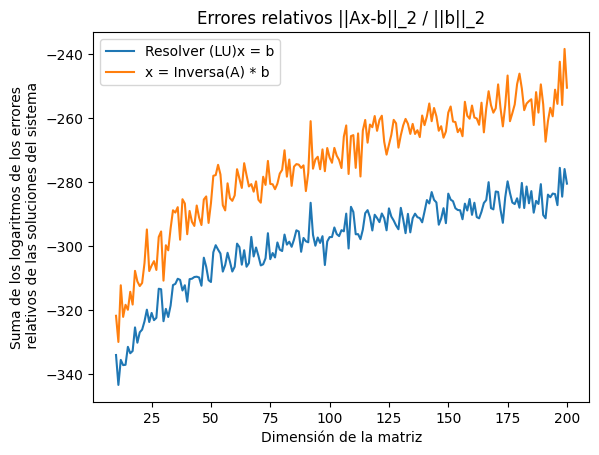

In [18]:
n = np.arange(10, 10+len(ej7_v1))
plt.plot(n, ej7_v1, label = 'Resolver (LU)x = b')
plt.plot(n, ej7_v2, label = 'x = Inversa(A) * b')
plt.title('Errores relativos ||Ax-b||_2 / ||b||_2')
plt.xlabel('Dimensión de la matriz')
plt.ylabel('Suma de los logaritmos de los errores\n relativos de las soluciones del sistema')
plt.legend()
plt.show()

#### Conclusiones del ejercicio:
Antes de analizar el gráfico y llegar a las conclusiones correspondientes tenemos que tener en mente que el logaritmo natural ($ln$) de un número es negativo si el número se encuentra en el intervalo $(0,1)$. Analizando que pasa cuando el límite de esta función tiende a $0$, nos encontramos que para valores que sean muy cercanos al $0$ el logaritmo toma valores negativos de mayor magnitud en comparación con aquellos cercanos al $1$. Con esto en mente, mientras más negativo sea el número que nos encontremos en la coordenada de un vector quiere decir que más cerca de $0$ estaban los errores. Habiendo hecho esta aclaración que va a ser válida tanto para este ejercicio como para los siguientes podemos pasar al análisis en sí del gráfico.

Analizando los resultados arrojados por el gráfico que se encuentra arriba podemos apreciar como el error relativo que se obtiene al calcular el vector $b$ utilizando el método de la descomposición $LU$ es mucho menor que el que se obtiene al hacerlo con el método de la función inversa lo que nos dice que el método es más estable (esta situación de un menor error por parte del método $LU$ se corresponde con algunos valores que obtuvimos en los ejercicios anteriores donde debíamos probar ambos métodos).

Este menor error asociado al método de la descomposición $LU$ creemos que se debe al hecho de que una vez calculada la descomposición quedan resolver dos sistemas triangulares mientras que en el método de la inversa tenemos que calcular la descomposición, resolver n sistemas asociados a cada vector canónico y luego resolver el sistema original. Entonces se hace evidente que la cantidad de operaciones de un método es mayor que la del otro, lo que implica que vamos arrastrando un error cada vez mayor.

Sin embargo, a pesar de que podamos compararlos y decir que uno es más "estable" que el otro, a decir verdad no son métodos estables, lo que se ve evidentemente en la cantidad de picos que tiene cada curva. Esta fuerte presencia de picos nos permite visualizar que los errores que se van produciendo no son consistentes o dicho de otra manera que para una matriz de un tamaño $n$ (con $n>10$) el error relativo puede ser mayor o menor que el de la matriz de tamaño $n$+1 (también para la de $n-1$). Por lo tanto, no podemos asegurar que el error siempre vaya a ser bajo sino que es muy variable dependiendo de las dimensiones de la matriz lo que no vuelve confiables a ambos métodos para obtener soluciones precisas.

Por último, si bien ambos errores tienen magnitudes pequeñas y son muy variables según la dimensión, si se desea una mayor precisión a la hora de trabajar sería preferible utilizar el método de la descomposición LU, sobre todo con valores muy grandes. Mientras más grande es la dimensión de la matriz mayor es la distancia entre ambos errores, es decir, mayor es el error que genera el método correspondiente a la inversa. Pero de vuelta, recordemos que estas implementaciones son muy inestables.

### Grafico ejercicio 8


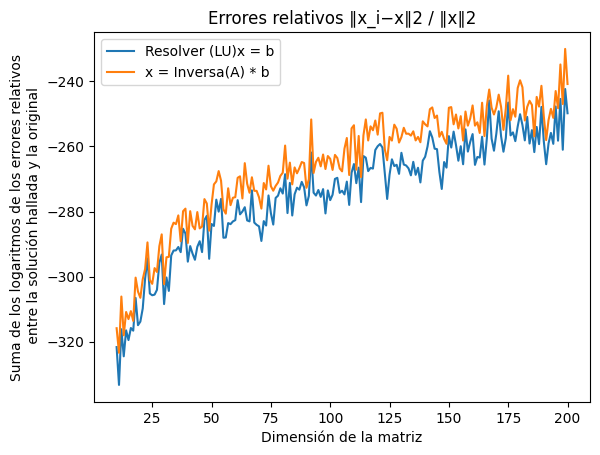

In [19]:
n = np.arange(10, 10+len(ej8_v3))
plt.plot(n, ej8_v3, label = 'Resolver (LU)x = b')
plt.plot(n, ej8_v4, label = 'x = Inversa(A) * b')
plt.title('Errores relativos ∥x_i−x∥2 / ∥x∥2')
plt.xlabel('Dimensión de la matriz')
plt.ylabel('Suma de los logaritmos de los errores relativos\n entre la solución hallada y la original')
plt.legend()
plt.show()

#### Conclusiones del ejercicio

Nuevamente vemos errores de magnitudes pequeñas que crecen a medida que crece la dimensión del vector $x$. Sin embargo, vemos que el error que se produce entre la solución calculada y la solución original para ambos métodos es muy similar y tiene comportamientos muy parecidos para ambos (incluso a veces solapándose). Esto a priori nos resulta un poco desconcertante con lo que obtuvimos en el caso anterior ya que los errores que obtenemos cuando queremos volver a calcular $b$ con la solución de la inversa son considerablemente mayores al de la desomposición $LU$. Lo que nos lleva a creer que gran parte del error se da con el manejo que hace Python de números tan pequeños que son con los que estamos trabajando.

A su vez, este gráfico no solo nos dice que el error respecto de la solución original tiene una magnitud pequeña sino que también la distancia entre los errores de ambos métodos no es tan grande y no aumenta a pasos tan agigantados como vimos para el caso anterior por lo que para calcular soluciones obtenemos resultados que no difieren tanto de los originales por lo tanto podríamos considerarlos confiables.

Finalmente, las observaciones que se pueden hacer sobre las curvas son las mismas que el ejercicio anterior y nuevamente si queremos el método de menor error sería preferible utilizar el de LU y no la inversa.

### Grafico del ejercicio 9

Para el caso de este ejercicio decidimos incluir en los gráficos las curvas de los ejercicios anteriores para poder no solo para ver si el comportamiento es similar sino también para ver las diferencias en los errores.

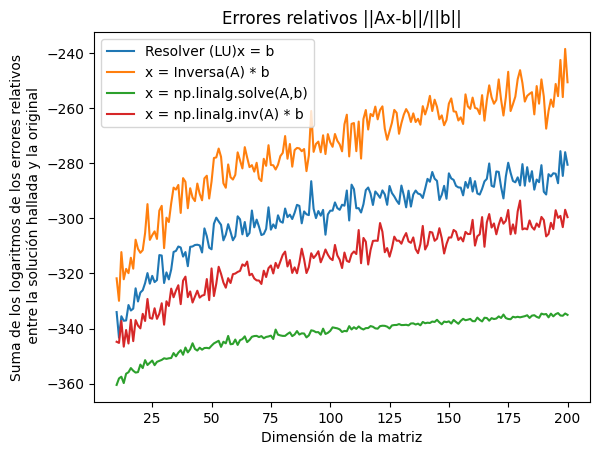

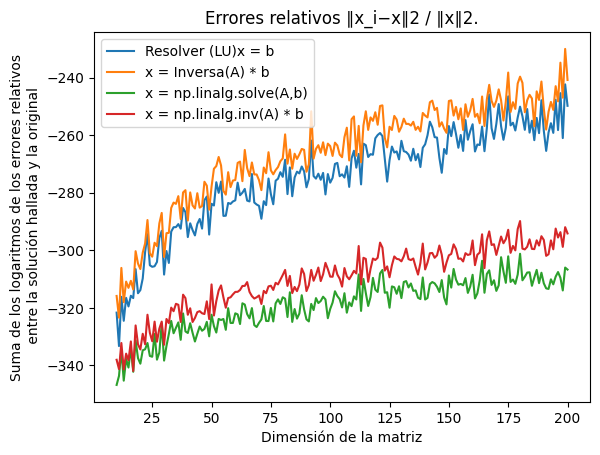

In [20]:
#Grafico de los errores del 7 en comparación con los del 9
n = np.arange(10, 10+len(ej7_v1))
plt.plot(n, ej7_v1, label = 'Resolver (LU)x = b')
plt.plot(n, ej7_v2, label = 'x = Inversa(A) * b')
plt.plot(n, ej9_v5, label = 'x = np.linalg.solve(A,b)')
plt.plot(n, ej9_v6, label = 'x = np.linalg.inv(A) * b')
plt.title('Errores relativos ||Ax-b||/||b||')
plt.xlabel('Dimensión de la matriz')
plt.ylabel('Suma de los logaritmos de los errores relativos\n entre la solución hallada y la original')
plt.legend()
plt.show()

#Grafico de los errores del 8 en comparación con los del 9
n = np.arange(10, 10+len(ej8_v3))
plt.plot(n, ej8_v3, label = 'Resolver (LU)x = b')
plt.plot(n, ej8_v4, label = 'x = Inversa(A) * b')
plt.plot(n, ej9_v7, label = 'x = np.linalg.solve(A,b)')
plt.plot(n, ej9_v8, label = 'x = np.linalg.inv(A) * b')
plt.title('Errores relativos ∥x_i−x∥2 / ∥x∥2.')
plt.xlabel('Dimensión de la matriz')
plt.ylabel('Suma de los logaritmos de los errores relativos\n entre la solución hallada y la original')
plt.legend()
plt.show()

#### Conclusiones de los gráficos

Como es posible constatar en ambos gráficos, el comportamiento tanto del comando `np.linalg.solve` como el de `np.linalg.inv` es el misms que el observado en los dos experimentos anteriores. Es decir, el método de mayor error en ambos casos es el que calcula la solución utilizando la inversa de la matriz.

Respecto del primer gráfico, podemos ver como el error que genera multiplicar $A$ por la solución calculada por el comando `np.linalg.solve` es considerablemente menor que el de la inversa y además como la curva que lo representa es una curva que casi no tiene picos, podemos considerar al método más estable que el de la inversa y el cálculado por nosotros. Esto nos habla de que hay una mayor precisión a la hora de encontrar el $x$ ya que el producto nos da cercano.

Respecto del segundo gráfico, podemos ver como la distancia entre las curvas es menor que la del primer gráfico pero mayor que la de nuestros métodos, lo que nos permite entrever que la implementación de `np.linalg.solve` tiene una muy buena implementación ya que despeja $x$ de forma precisa y no arrastra tanto error (lo vemos en el pico de las curvas). Finalmente, si bien este gráfico arroja que la distancia en el error relativo de ambas soluciones no tiene una magnitud considerable, el de arriba nos ayuda a visualizar que la solución hallada por  `np.linalg.solve` es la de mayor precisión. No podríamos entender un gráfico sin contar con el otro.

### Ejercicio 10
Para realizar el ejercicio 10 vamos a utilizar la función que calcula la matriz de Hilbert que definimos al principio. También nos parece oportuno mencionar que cuando fuimos testeando distintas instancias vimos que para el caso que se da cuando matriz tiene dimensión $2$ X $2$ algunas veces ambos errores relativos dan 0 (situación que antes no se nos había presentado). Para sortear este problema decidimos en esos casos sumar el épsilon de máquina para evitar una indefinición del logaritmo.

In [ ]:
for n in range(2,21):
    A = matriz_H(n)
    for repeticiones in range(10):
        x = 2 * np.random.rand(n) - 1
        b = A @ x

        sol_x1 = resolverLU(A,b)
        sol_x2 = inversa(A) @ b

        error_relativo_sol_x1 = errorRelativo_n2((A @ sol_x1), b)
        error_relativo_sol_x2 = errorRelativo_n2((A @ sol_x2), b)

        if error_relativo_sol_x1 == 0:
          error_relativo_sol_x1 += np.finfo(float).eps
        if error_relativo_sol_x2 == 0:
          error_relativo_sol_x2 += np.finfo(float).eps

        ej10_v9[n-2] += np.log(error_relativo_sol_x1)
        ej10_v10 [n-2] += np.log(error_relativo_sol_x2)

    nums_de_condicion[n - 2] = np.linalg.cond(A)

print('Los números de condición de las 19 matrices calculadas son:\n',nums_de_condicion)
print(ej10_v10)

### Gráficos del ejercicio 10

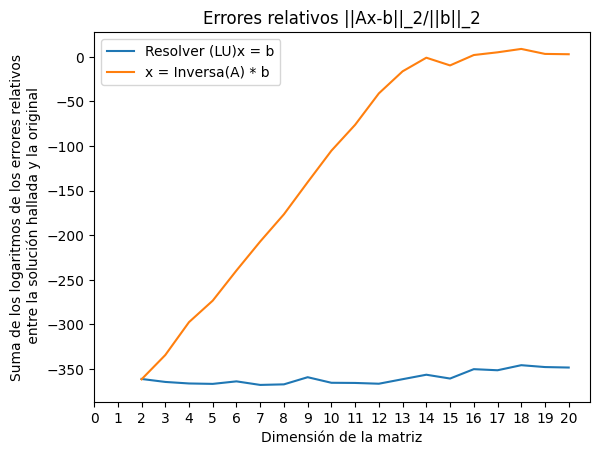

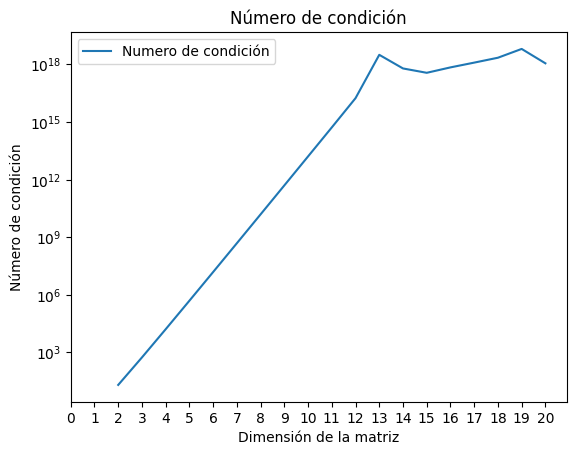

In [22]:
n = np.arange(2, 2+len(ej10_v9))
plt.plot(n, ej10_v9, label = 'Resolver (LU)x = b')
plt.plot(n, ej10_v10, label = 'x = Inversa(A) * b')
plt.title('Errores relativos ||Ax-b||_2/||b||_2')
plt.xlabel('Dimensión de la matriz')
plt.ylabel('Suma de los logaritmos de los errores relativos\n entre la solución hallada y la original')
plt.xticks(np.arange(0, 2+len(ej10_v9)))
plt.legend()
plt.show()

n = np.arange(2, 2+len(ej10_v9))
plt.plot(n, nums_de_condicion, label = 'Numero de condición')
plt.title('Número de condición')
plt.yscale('log')
plt.xlabel('Dimensión de la matriz')
plt.ylabel('Número de condición')
plt.xticks(np.arange(0, 2+len(ej10_v9)))
plt.legend()
plt.show()

#### Conclusiones de los gráficos

Antes de comenzar con el análisis de cada uno queremos aclarar que ambos gráficos han sido puestos juntos ya que no podemos entender que está pasando en uno sin recurrir al otro.

En el primer gráfico, podemos observar que el error del método $LU$ es considerablemente menor al de la inversa (incluso de una forma más notoria que para casos anteriores). No solo la diferencia es imponente sino también que vemos como el método de `resolver LU` es más estable ya que los errores se mantienen casi todos en un valor cercano. Además, el hecho de que la curva relacionada al método de la inversa haya pasado el 0 nos quiere decir que la magnitud de los errores es muy grande (recordemos el comportamiento del logaritmo natural que para valores en el intervalo $(1, ∞)$ es positivo y creciente). Sin embargo, para mejorar la comprensión de este suceso veamos que pasa en el segundo gráfico.

En el segundo gráfico, podemos ver como el número de condición de la matriz crece considerablemente pasando de una magnitud de $10^3$ cuando la dimensión de la matriz es de $2$ X $2$ a una de $10^8$ cuando la dimensión de la matriz es de $13$ x $13$. Esto no solo nos habla de que la matriz es poco estable debido a que el $cond(A)$ se dispara rápidamente, sino que también si recordamos que el $\frac{1}{cond(A)} \le inf \lbrace \frac{||A - B||}{||A||} : B$ es singular$\rbrace$ este resultado nos dice que la distancia de A a una matriz singular es cada vez más chica a medida que la dimensión comienza a crecer. Por lo tanto, no solo podemos afirmar que la matriz $A$ es una matriz muy mal condicionada sino que también a medida que crezca la dimensión  calcular la inversa de A va a ser más costoso y se van a empezar a arrastrar errores considerables que van a impactar en los resultados.

Esto último que mencionamos en el párrafo anterior es la causa de que el comportamiento de la curva del número de condición de la matriz y del error cometido cuando se calcula $b$ a partir de la solución obtenida por el método de la inversa sea tan similar. Justamente como cada vez se hace más costoso calcular la inversa y se arrastran tantos errores, las soluciones van a diferir considerablemente de las originales lo que va a llevar a que el error relativo que se comete al volver a calcular $b$ sea tan grande.

Esto que pudimos visualizar en este experimento hace evidente por qué conviene resolver sistemas utilizando factorizaciones y no inviertiendo matrices. Y es que si bien A es una matriz mal condicionada, sigue siendo inversible y, por lo tanto, los sistemas $Ax = b$  van a tener siempre una única solución. Ahora para llegar a esta solución, como la matriz está mal condicionada, el método de la inversa genera errores demasiado grandes lo que hace que no convenga elegir este camino sino que convenga factorizar.

## Conclusiones finales

Para concluir, luego de haber realizado todos los ejercicios y analizado cada uno de los gráficos, nos dimos cuenta de la importancia de la factorización de matrices a la hora de resolver sistemas. Como vimos en los ejercicios 7, 8 y 9, la factorización de matrices no solo es un método que arrastra menos error y permite llegar a las soluciones más precisas sino que también, si hacemos una buena implementación, como la de `NumPy`, tendremos un método más estable.

Sin embargo, se podría argumentar que el error entre utilizar una factorización $LU$ y la inversa de una matriz no tiene magnitudes tan grandes (hablando al menos de nuestra implementación) por lo tanto va a ser indiferente el método que se elija. Justamente el ejercicio 10 nos permite entender por qué esto no es así y es preferible la factorización; y es que en el caso de que tengamos matrices que no sabemos si están bien o mal condicionadas, el error que puede producir el método de la inversa en una matriz mal condicionada es demasiado grande y, encima, creciente en comparación con el de la factorización, que se mantiene bajo y estable.

Estas dos observaciones nos permiten concluir por qué es preferible trabajar con el método de factorización por sobre el de inversa a la hora de resolver un sistema: no solo es el de menor error (tanto para reconstruir $b$ como para despejar $x$) sino que si tenemos una matriz mal condicionada el método de la inversa es muy inestable y genera errores de grandes magnitudes que van creciendo a medida que crece la dimensión de la matriz. Vale la pena mencionar que si conociéramos distintas propiedades de las matrices de entrada podríamos llegar a utilizar otras factorizaciones como la de Cholesky por ejemplo.

Por último, nos gustaría destacar que nos interesamos por ver como estaban implementados `np.linalg.solve` y `np.linalg.inv` (dada la estabilidad del primero mostrada en el primer gráfico) para así ver si se utilizaba un método distinto que el de $LU$ o  comprender donde podría estar nuestro error. Viendo la [documentación](https://github.com/numpy/numpy/blob/v1.26.0/numpy/linalg/linalg.py#L329-L411) nos topamos con el comando `dgesv` de [LAPACK](https://www.netlib.org/lapack/explore-html/d7/d3b/group__double_g_esolve_ga5ee879032a8365897c3ba91e3dc8d512.html) que calcula una descomposicón $PA = LU$ tanto para `np.linalg.solve` como para `np.linalg.inv`. Por lo tanto, no solo creemos que nuestro código debe hacer más operaciones que las que son verdaderamente necesarias sino que también debemos mejorar el manejo de la precisión de las cuentas que realizamos.